###        **Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods**

*The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.*


- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

### Importing  Libraries & Modules  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
df = pd.read_excel('/home/hp/Documents/Data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df.rename(columns={'AT':'Temperature', 'AP':'Ambient Pressue', 'V':'Exhaust Vacuum', 'RH':'Relative Humidity', 'PE':'Power Output'}, inplace=True)
df

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity,Power Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### Exploratory Data Analysis    [EDA]

In [5]:
df.head()

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity,Power Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
df.tail()

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity,Power Output
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [7]:
df.isna().sum()

Temperature          0
Exhaust Vacuum       0
Ambient Pressue      0
Relative Humidity    0
Power Output         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9568 non-null   float64
 1   Exhaust Vacuum     9568 non-null   float64
 2   Ambient Pressue    9568 non-null   float64
 3   Relative Humidity  9568 non-null   float64
 4   Power Output       9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.describe()

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity,Power Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
x

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [13]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Power Output, Length: 9568, dtype: float64

<AxesSubplot: xlabel='Temperature', ylabel='Power Output'>

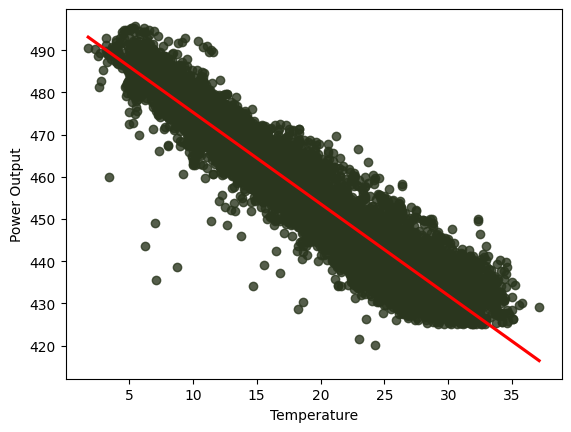

In [14]:
sns.regplot(x=df['Temperature'], y=y, color='#2A361E', line_kws={'color':'r'})

<AxesSubplot: xlabel='Exhaust Vacuum', ylabel='Power Output'>

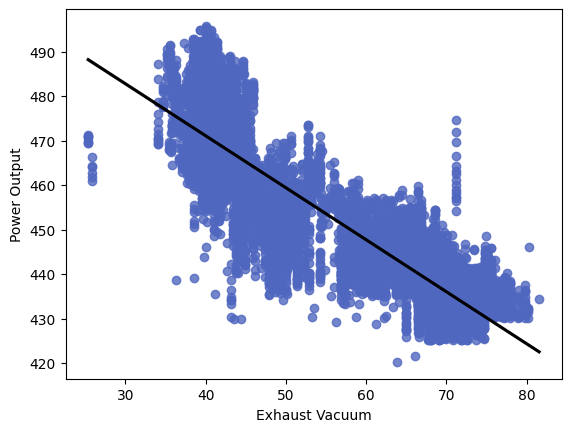

In [15]:
sns.regplot(x=df['Exhaust Vacuum'], y=y, color='#5067BF', line_kws={'color':'k'})

<AxesSubplot: xlabel='Ambient Pressue', ylabel='Power Output'>

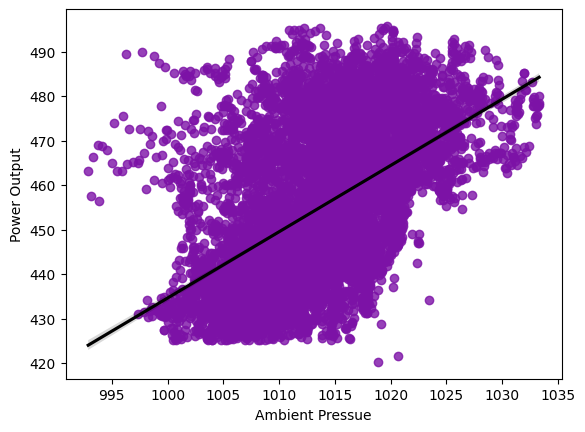

In [16]:
sns.regplot(x=df['Ambient Pressue'], y=y, color='#7C12A6', line_kws={'color':'k'})

<AxesSubplot: xlabel='Relative Humidity', ylabel='Power Output'>

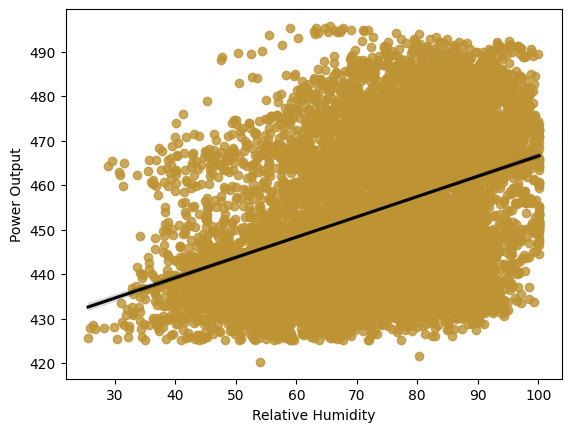

In [17]:
sns.regplot(x=df['Relative Humidity'], y=y, color='#BD9334', line_kws={'color':'k'})

### Model selection and creation

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [19]:
x_train

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity
6699,28.86,73.18,1012.46,68.80
8470,20.96,69.48,1011.04,82.63
8432,27.23,44.05,1005.69,58.91
2198,25.37,66.75,1017.94,79.26
2249,31.68,73.68,1014.85,64.00
...,...,...,...,...
2895,26.92,62.44,1011.09,70.80
7813,20.90,67.71,1007.16,59.02
905,18.59,39.54,1008.56,68.61
5192,22.96,45.01,1012.21,50.81


In [20]:
x_test

,Temperature,Exhaust Vacuum,Ambient Pressue,Relative Humidity
5014,17.93,44.63,1003.54,87.41
6947,16.34,42.28,1008.08,52.80
9230,25.97,70.32,1007.48,57.01
4290,6.77,38.18,1017.80,81.13
6477,8.64,39.69,1001.57,98.27
...,...,...,...,...
842,26.34,59.21,1013.37,58.98
2600,27.27,72.58,1009.25,89.31
7903,29.12,74.87,1009.85,62.51
4280,18.87,52.05,1012.02,53.46


In [21]:
y_train

6699    427.01
8470    444.31
8432    440.20
2198    434.16
2249    431.11
         ...  
2895    437.99
7813    446.57
905     462.56
5192    450.37
235     452.94
Name: Power Output, Length: 6697, dtype: float64

In [22]:
y_test

5014    458.96
6947    463.29
9230    435.27
4290    484.31
6477    473.55
         ...  
842     439.22
2600    428.93
7903    435.51
4280    458.64
8663    442.62
Name: Power Output, Length: 2871, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
ml_model = LinearRegression()
ml_model.fit(x_train, y_train)
y_pred = ml_model.predict(x_test)
y_pred

array([457.24239918, 466.64519538, 440.29758932, ..., 432.27911592,
       459.46104375, 446.09455366])

### Performance Measurement

In [27]:
print(f'Intercept is {ml_model.intercept_}')
slope= ml_model.coef_
list(zip(x, slope))

Intercept is 458.39877507317823


[('Temperature', -1.97137593409247),
 ('Exhaust Vacuum', -0.23772975459591333),
 ('Ambient Pressue', 0.05834485350261928),
 ('Relative Humidity', -0.15731747773360555)]

In [29]:
from sklearn.metrics import mean_absolute_error
mean_error = mean_absolute_error(y_pred, y_test)
mean_error

3.6578584026406165

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
Per_mean_error = mean_absolute_percentage_error(y_pred, y_test)
Per_mean_error

0.008065005602217217

In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score


0.9238743433670232